# VECTORIZACION DE IMAGENES
```
Nombre: Pfoccori Quispe Alex Harvey
```

# **1. PASOS PREVIOS**

## Librerias

In [16]:
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

%matplotlib inline

import random
from os import listdir
from os.path import isfile, isdir
from skimage import feature, data, color
from skimage.transform import rescale, resize, downscale_local_mean
import cv2

## Funcion que dada una ruta obtiene los archivos del mismo

In [17]:
def ArchivoDir(path):
    return [obj for obj in listdir(path) if isfile(path + obj)]

# **2. CONVERSION DE IMAGEN A VECTOR DE PIXLES**

## Generacion de vector de pixeles en archivo csv

In [22]:
# Por cada sub carpeta se crea un archivo csv, que contiene un vector de pixeles

variedad = ['Amoeba', 'Euglena', 'Hydra', 'Paramecium', 'Rod_bacteria',
            'Spherical_bacteria', 'Spiral_bacteria', 'Yeast']

# Repeticion pro cada sub carpeta
for dir in variedad:
    Ruta = './MO/' + dir + '/'
    files = ArchivoDir(Ruta)

    # Array para almacenar datos vectorizados
    pixel = []
    # Repeticion por cada archivo de imagen
    for file in files:
        # Convierte imagen en escala de grices
        image = cv2.imread(Ruta + file, cv2.IMREAD_GRAYSCALE)
        # Reescala la imagen a una dimension de 80x60 pixeles
        image_rescaled = cv2.resize(image, (80,60), interpolation=cv2.INTER_AREA)
        try:
            # Obtienen imagen vectorizado y etiquetado
            img = np.reshape(image_rescaled, (80, 60))
            img = np.append(img, dir)
            pixel.append(img)
        except:
            # Mostrar error de imagenes que no pudieron ser procesados
            print('Error -> ' + Ruta + file)

    # Convierte array de imagenes a dataframe de pandas
    df = pd.DataFrame(pixel)

    # Grabar archivo en formato csv
    df.to_csv('./MO/' + dir + '.csv', index=False, sep=',')

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


## Modulo que funciona en un archivo, archivos con el mismo formato de una carpeta

In [23]:
import pandas as pd
import os

def join_csv(path=None, out_file=None):
    if path is None:
        file = [file for file in os.listdir() if '.csv' in file]
    else:
        files = [os.path.join(path, file) for file in os.listdir(path) if '.csv' in file]

    df = pd.concat(map(pd.read_csv, files), ignore_index=True)

    if out_file is not None:
        if path is None:
            df.to_csv(out_file)
        else:
            df.to_csv(os.path.join(path, out_file))

    return df

## Ejecucion de la juntas

In [24]:
join_csv('./MO/', './MO.csv')

,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,4800
0,251,251,250,249,249,249,248,247,247,247,...,230,229,225,228,230,230,230,229,228,Rod_bacteria
1,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,Rod_bacteria
2,98,113,125,133,123,147,151,161,170,105,...,168,144,122,91,77,115,86,68,51,Rod_bacteria
3,187,222,174,150,143,138,115,91,159,178,...,157,196,199,181,160,148,151,160,185,Rod_bacteria
4,1,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,1,1,1,1,Rod_bacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,255,255,255,255,255,254,254,255,254,254,...,255,255,254,254,254,254,254,254,254,Paramecium
785,81,82,82,84,88,98,108,110,98,83,...,85,81,85,85,85,86,86,87,89,Paramecium
786,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,Paramecium
787,110,109,110,110,110,109,109,110,110,110,...,95,95,96,96,94,95,95,96,95,Paramecium


## Recuperacion de datos (vector de pixeles) y visualizacion

In [25]:
ds = pd.read_csv('./MO/MO.csv', delimiter=',', header=0, index_col=0)
ds.head()
x = ds.drop(['4800'], axis=1)
y = ds['4800']

## Cantidad de datos del archivo

In [26]:
ran = ds.shape[0] - 1

## Muestra aleatoriamente vectores de pixeles en formato de imagen

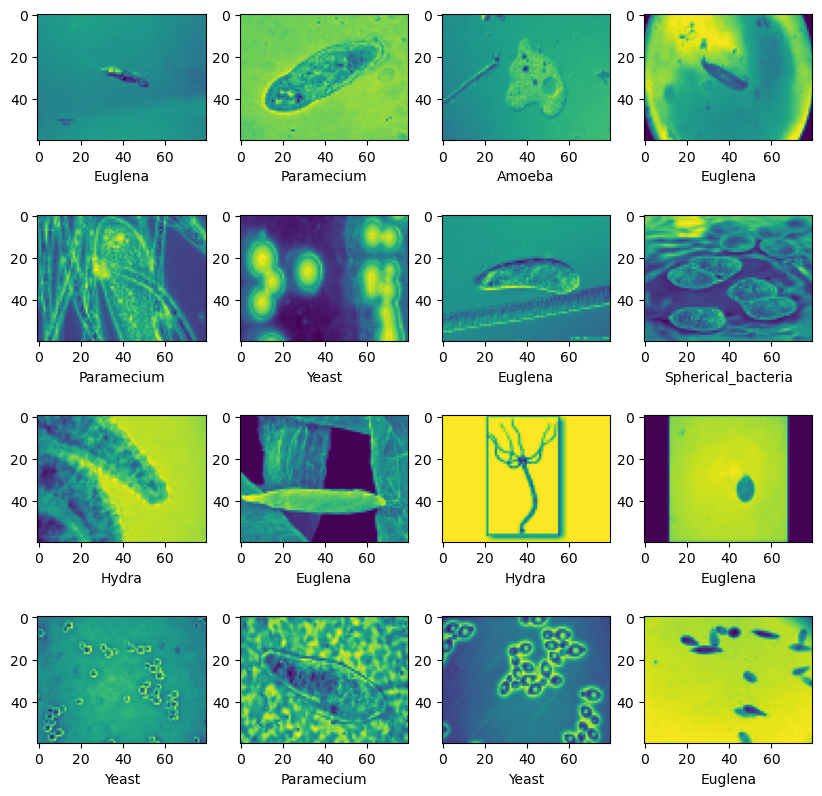

In [27]:
# Muestra aleatorioa de imagenes recuperadas
fig, ax = plt.subplots(4, 4, figsize=(10,10))

for k in range(4):
    for j in range(4):
        azar = random.sample(range(ran), 1)
        img = np.array(x.iloc[azar].values)
        img = np.array(img).reshape(60,80)
        ax[k, j].imshow(img)
        ax[k, j].set_xlabel(y[azar[0]])

plt.show()